# **Metropolis Monte Carlo: Esercizio 2 punto 3**

Implement a Metropolis MC loop to find the equilibrium configuration of a Ag cluster of fixed number of atoms 𝑁, randomly deposited on the flat ℎ 𝑥,𝑦 = 0 substrate. The energy of each configuration is evaluated by counting all bonds, (energies 𝐽0 and 𝐽1) formed by the 𝑁 atoms above the substrate. Each MC move consists in relocating one adatom at a randomly chosen site.

## *SVOLGIMENTO PUNTO 3*

Consider the MC loop at 𝑇 = 0 𝐾 and find the minimum-energy configuration of clusters from 𝑁 = 2 to 20. Check that in each case the global minimum is found by considering a long-enough MC loop and avoid metastable configurations by changing the random generator seed. Plot the energy of the minima 𝐸𝑚𝑖𝑛(𝑁) and the chemical potential 𝜇(𝑁) = 𝐸𝑚𝑖𝑛(𝑁)/𝑁. Analyze the results and interpret the alternating slope of 𝜇(𝑁) by considering the changes from one configuration to the next.

---

### 0) Importazioni e dati

In [1]:
import numpy as np
from CMS.MonteCarlo.MetropolisMonteCarlo import MetropolisMonteCarlo

In [2]:
temperature = 0   
L = (60,60) # dimensioni della griglia in unità di celle cristalline
N_atoms = np.arange(2, 21, 1) # numero di atomi da posizionare
seeds = [123413432, 4324234, 9876543, 5678901, 3456789, 8765432, 2345678,
        23, 4567890]

### 1) Simulazione

Da 2 atomi a 20\
Un solo seed, step=100_000: 20 secondi.\
9 seed diversi, step=300_000: 8minuti.

**ottimizzazioni**\
*mi aspetto velocizzazione del 20% (8min -> 6 e qualcosa)*
- no copia matrice trial_height
- update dell'energia invece di ricalcolo completo
- occupied_sites ora è una list, non più matrice di bool

9 seed diversi, step=300_000: 6minuti.

In [3]:
from CMS.MonteCarlo.ioMMC import XYZwriter

In [4]:
results_dict = {}
for seed in seeds:
    print(f"===== Simulazione con seed={seed} =====")
    print(f"N =", end=" ")
    for N in N_atoms:
        print(f"{N},", end=" ")
        xyz_writer = XYZwriter(output_folder=f"output/Es2_3/seed={seed}/MMC~N={N}~T={temperature}/")
        simulazione = MetropolisMonteCarlo(
            L=L,
            N_atoms=N,
            T=temperature,
            xyz_writer=xyz_writer,
            seed=seed
        )
        result = simulazione.run(N_steps=300_000, thermalization_steps=60_000)
        if result.min_energy < results_dict[N].min_energy if N in results_dict else np.inf:
            results_dict[N] = result  
    print("\n")

===== Simulazione con seed=123413432 =====
N = 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 

===== Simulazione con seed=4324234 =====
N = 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 

===== Simulazione con seed=9876543 =====
N = 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 

===== Simulazione con seed=5678901 =====
N = 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 

===== Simulazione con seed=3456789 =====
N = 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 

===== Simulazione con seed=8765432 =====
N = 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 

===== Simulazione con seed=2345678 =====
N = 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 

===== Simulazione con seed=23 =====
N = 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 

===== Simulazione con seed=4567890 =====
N = 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13

### 2) Analisi e plot

In [5]:
import matplotlib.pyplot as plt

#### Energia minima vs N

Nel modello _solid-on-solid_ considerato si ha che l'energia di un singolo atomo è lineare nel numero di primi vicini di quell'atomo $n^{(1)}_k$:

$$
\varepsilon_k = J_0 + n^{(1)}_k J_1
$$

pertanto, aggiungendo un atomo alla volta, ci si aspetta una variazione costante di energia tra un numero di atomi e l'altro. Se, ad esempio, ad ogni aggiunta di un atomo aumenta di 1 il numero di primi vicini di due atomi, allora si avrà un incremento (diminuzione perché $J_1<0$) dell'energia pari a $\Delta E = 2J_1$ per ogni nuovo atomo. La geometria reale è più complicata, pertanto non si osserva una linea retta perfetta, ma in generale la dipendenza resta **lineare nel numero di atomi**.

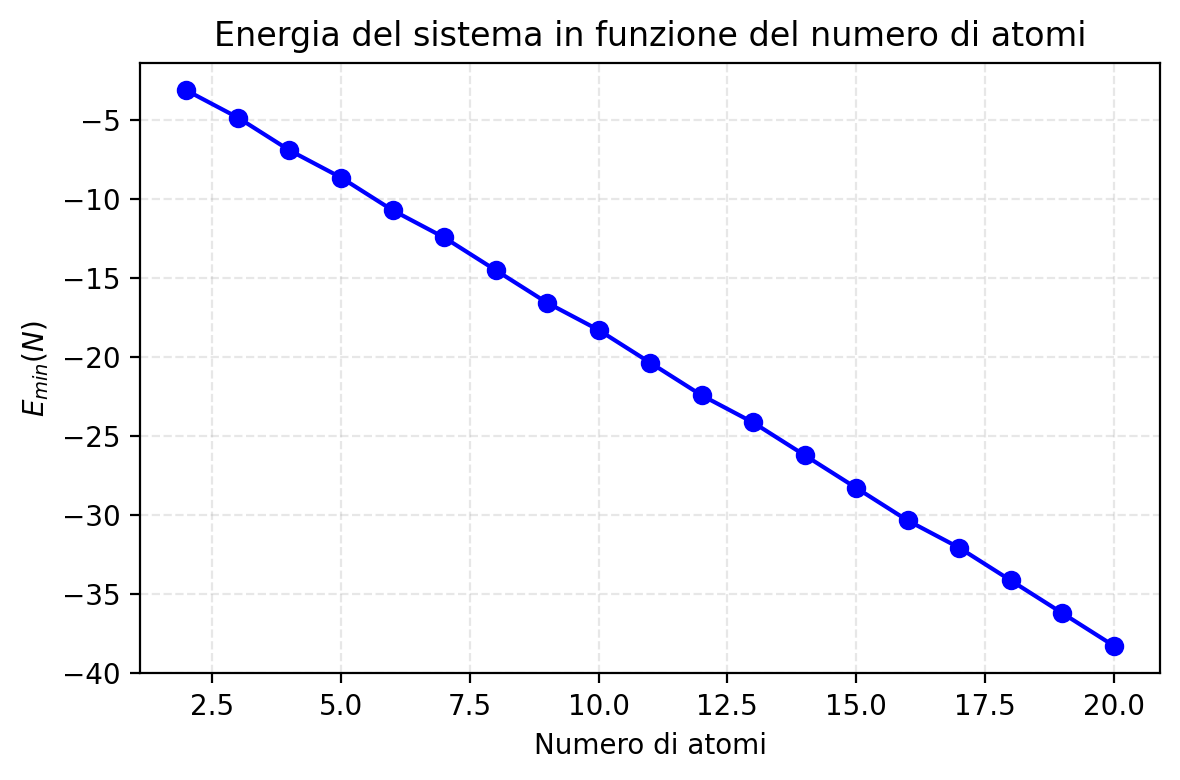

In [19]:
# plot energia minima v N
plt.figure(figsize=(6, 4), dpi=200)

x1 = N_atoms # da 2 atomi a 20
y1 = [results_dict[N].min_energy for N in N_atoms]

plt.plot(x1, y1, marker='o', color='blue')
plt.xlabel('Numero di atomi')
plt.ylabel(r'$E_{{min}}(N)$')
plt.title('Energia del sistema in funzione del numero di atomi')
plt.grid(linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#### Potenziale chimico vs N

Ci si aspetta di osservare dei minimi locali in corrispondenza dei massimi di primi vicini: se il numero di atomi è un quadrato perfetto, si potrà massimizzare il numero di atomi all'interno del cluster e quindi massimizzarne il numero di vicini. Anche se l'energia minima è lineare nel numero di atomi, ci si aspetta che il potenziale chimico risalga dopo ogni quadrato perfetto.

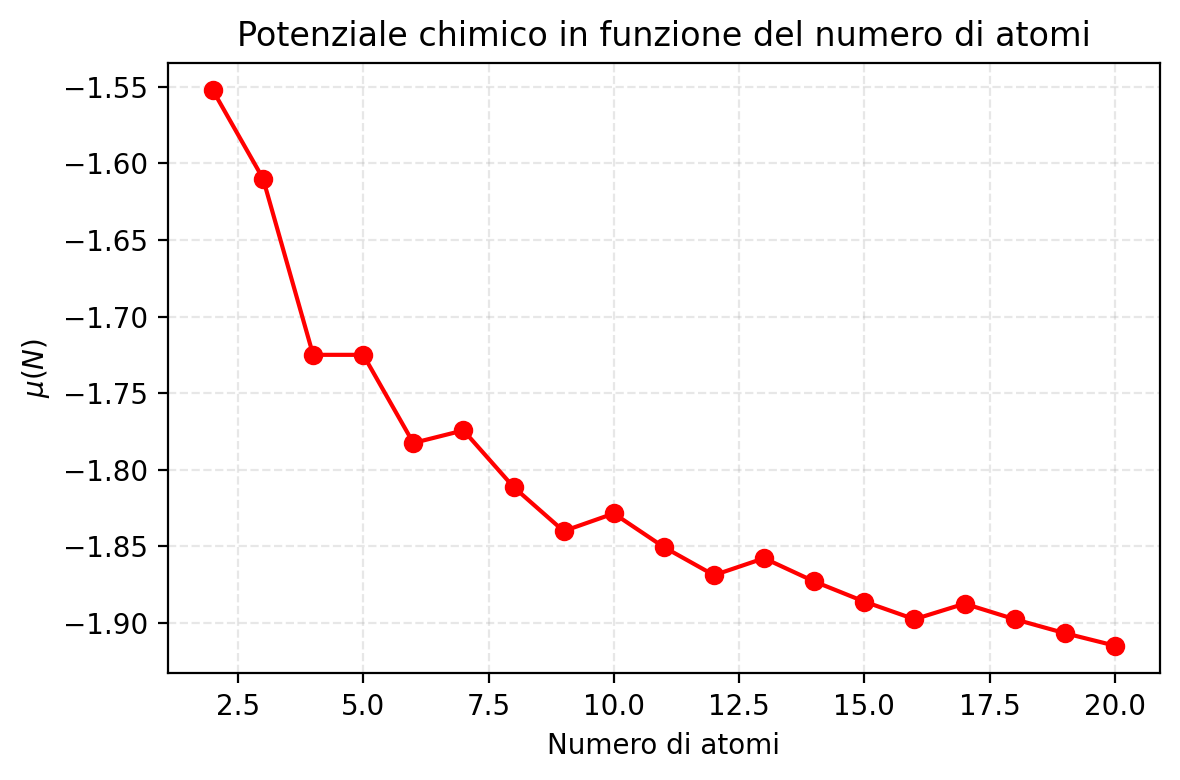

In [20]:
# plot energia/N v N
plt.figure(figsize=(6, 4), dpi=200)

x2 = N_atoms# da 2 atomi a 20
y2 = [results_dict[N].min_energy/N for N in N_atoms]

plt.plot(x2, y2, marker='o', color='red')
plt.xlabel('Numero di atomi')
plt.ylabel(r'$\mu(N)$')
plt.title('Potenziale chimico in funzione del numero di atomi')
plt.grid(linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [8]:
for N in N_atoms:
    print(f"{N}:", results_dict[N].min_energy/N)

2: -1.5524999999999998
3: -1.6099999999999997
4: -1.7249999999999996
5: -1.725
6: -1.7825000000000006
7: -1.7742857142857151
8: -1.8112500000000007
9: -1.8400000000000003
10: -1.8285
11: -1.8504545454545445
12: -1.8687499999999984
13: -1.8576923076923064
14: -1.8728571428571414
15: -1.8859999999999986
16: -1.8974999999999984
17: -1.887352941176469
18: -1.8974999999999982
19: -1.906578947368419
20: -1.9147499999999975


## Grafici insieme con assi sfalsate

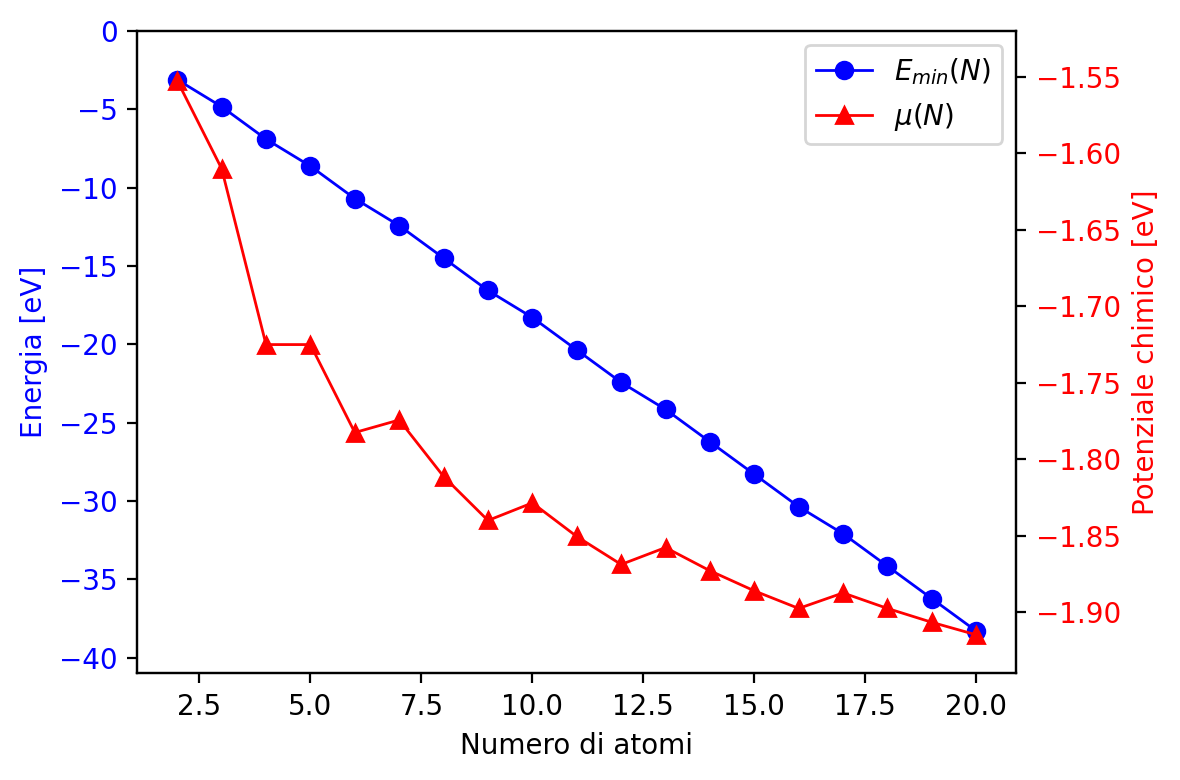

In [15]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=200)

# Curva 1: energia, asse Y sinistro
ln1 = ax.plot(x1, y1, color='blue', label=r'$E_{{min}}(N)$', linewidth=1.0, marker='o')
ax.set_xlabel('Numero di atomi')
ax.set_ylabel('Energia [eV]', color='blue')
ax.tick_params(axis='y', labelcolor='blue')
#ax.grid(True, alpha=0.3)

# Range richiesto -41 → 0 (asse invertito)
ax.set_ylim(-41, 0)

# Curva 2: potenziale chimico, asse Y destro
ax2 = ax.twinx()
ln2 = ax2.plot(x2, y2, color='red', linestyle='-', label=r'$\mu(N)$', linewidth=1.0, marker='^')
ax2.set_ylabel('Potenziale chimico [eV]', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Range richiesto -1.94 → -1.52 (asse invertito)
ax2.set_ylim(-1.94, -1.52)

# Legenda combinata
lines = ln1 + ln2
labels = [l.get_label() for l in lines]
ax.legend(lines, labels, loc='best')

fig.tight_layout()
#fig.savefig("S11-vs-frequenza.pdf", bbox_inches='tight')
plt.show()